<a href="https://colab.research.google.com/github/Alenushka2013/ML_for_people_lectures/blob/main/HW_2_1_%D0%9F%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B0_%D0%BB%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97_%D0%B7%D0%B0_%D0%BE%D0%B4%D0%BD%D0%BE%D1%8E_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D1%8E_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)
2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

In [ ]:
medical_df = pd.read_csv('medical-charges.csv') # замініть на ваш шлях до файлу
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [ ]:
X = non_smoker_df['age']
y = non_smoker_df['charges']

In [ ]:
def normal_equations(X,y):
    """Computes the closed-form solution to linear regression"""
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [ ]:
# Додаємо колонку одиничок аби задачи bias терм (константу в моделі регресії)
X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]
coefs_MNK = normal_equations(X_with_intercept, y)
predictions_MNK = np.dot(X_with_intercept, coefs_MNK)
rmse_MNK = root_mean_squared_error(y, predictions_MNK)
print(f'RMSE: {rmse_MNK}\nКоефіцієнти: {coefs_MNK}')

RMSE: 4662.505766636395
Коефіцієнти: [-2091.42055657   267.24891283]


In [ ]:
def gradient_descent(X, y, lr=0.1, epochs=100):
    m, b = 0.0, 0.0  # Початкові параметри
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = m * X[:, 0] + b
        error = y_pred - y
        m_gradient = (2/n) * np.dot(error, X[:, 0])
        b_gradient = (2/n) * np.sum(error)
        # print(m_gradient, b_gradient)
        m -= lr * m_gradient
        b -= lr * b_gradient
        errors.append(np.sum(np.square(error)))
    return m, b, errors


In [ ]:
X_gd = np.expand_dims(X.to_numpy(),axis=1)
m, b, errors = gradient_descent(X_gd, y, lr=0.000001, epochs=1000)
predictions_gd = m * X_gd[:, 0] + b
rmse_gd = root_mean_squared_error(y, predictions_gd)
print(f'RMSE: {rmse_gd}\nКоефіцієнти: {[b, m]}')

RMSE: 4723.647721473958
Коефіцієнти: [4.33124916239435, 213.4575690658104]


In [ ]:
print(X_with_intercept.shape, y.shape)

(1064, 2) (1064,)


In [ ]:
X_gd

array([[18],
       [28],
       [33],
       ...,
       [18],
       [18],
       [21]])

In [ ]:
y.to_numpy()

array([ 1725.5523 ,  4449.462  , 21984.47061, ...,  2205.9808 ,
        1629.8335 ,  2007.945  ])

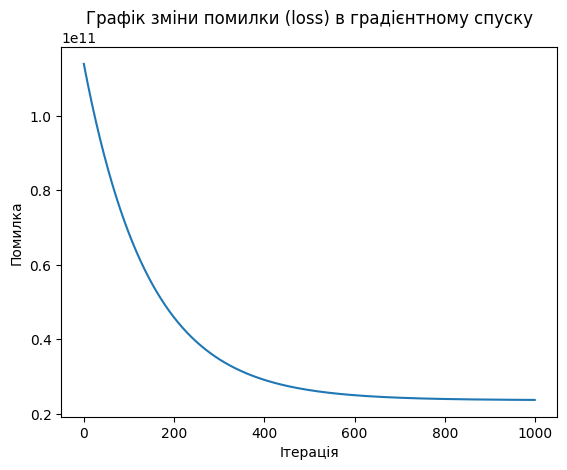

In [ ]:
plt.plot(errors)
plt.xlabel('Ітерація')
plt.ylabel('Помилка')
plt.title('Графік зміни помилки (loss) в градієнтному спуску');

In [ ]:
# Модель лінійної регресії засобами Scikit-learn (МНК)
X_scikit = X.to_frame()
lin_reg = LinearRegression()
lin_reg.fit(X_scikit, y)
predictions_sklearn = lin_reg.predict(X_scikit)
rmse_sklearn = root_mean_squared_error(y, predictions_sklearn)
print(f'RMSE: {rmse_sklearn}\nКоефіцієнти: {[lin_reg.intercept_, lin_reg.coef_[0], ]}')

RMSE: 4662.505766636395
Коефіцієнти: [-2091.4205565650864, 267.2489128311997]


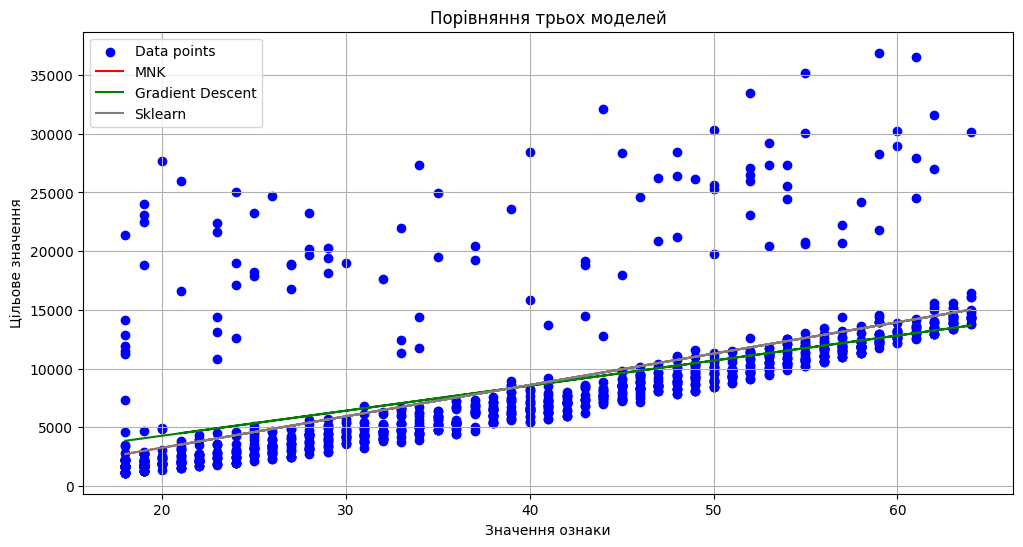

In [ ]:
# Візуалізація результатів
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions_MNK, color='red', label='MNK')
plt.plot(X, predictions_gd, color='green', label='Gradient Descent')
plt.plot(X, predictions_sklearn, color='grey', label='Sklearn')
plt.title('Порівняння трьох моделей')
plt.xlabel('Значення ознаки')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print('RMSE МНК: ', rmse_MNK)
print('RMSE град. спуску: ', rmse_gd)
print('RMSE sklearn: ', rmse_sklearn)

RMSE МНК:  4662.505766636395
RMSE град. спуску:  4723.647721473958
RMSE sklearn:  4662.505766636395


 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [ ]:
smoker_df = medical_df[medical_df.smoker == 'yes']

In [ ]:
lin_reg_smoker = LinearRegression()
lin_reg_smoker.fit(smoker_df[['age']], smoker_df['charges'])
predictions_smoker = lin_reg_smoker.predict(smoker_df[['age']])
rmse_smoker = root_mean_squared_error(smoker_df['charges'], predictions_smoker)
rmse_smoker

10711.00334810241

In [ ]:
lin_reg_smoker.coef_, lin_reg_smoker.intercept_

(array([305.23760211]), 20294.128126915966)

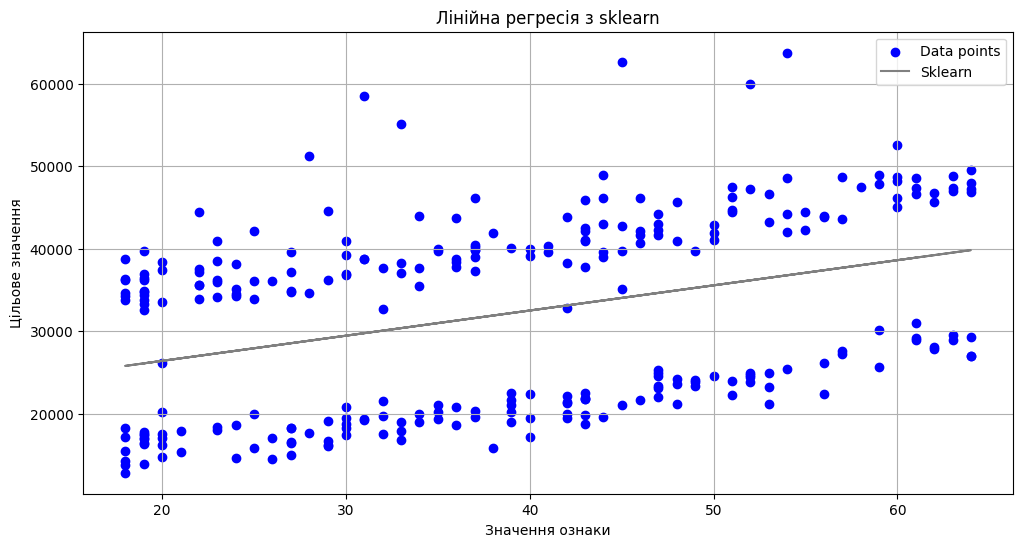

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(smoker_df['age'], smoker_df['charges'], color='blue', label='Data points')
plt.plot(smoker_df['age'], predictions_smoker, color='grey', label='Sklearn')
plt.title('Лінійна регресія з sklearn')
plt.xlabel('Значення ознаки')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()


Видно, що дані розділені на дві групи (верхня і нижня). Модель зараз створює лінію по центру, що не дуже добре апроксимує тенденцію в даних. Для використання в компанії, я б виявила, яка змінна, спричиняє це розділення на дві групи, і створила модель для курців окремо для кожної з двох груп точок.